In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [7]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
#creating frequency table for category
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [23]:
#finding top 5 in categories
top_five_categories = frequency_table.head(5)
top_five_categories 

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<Axes: ylabel='count'>

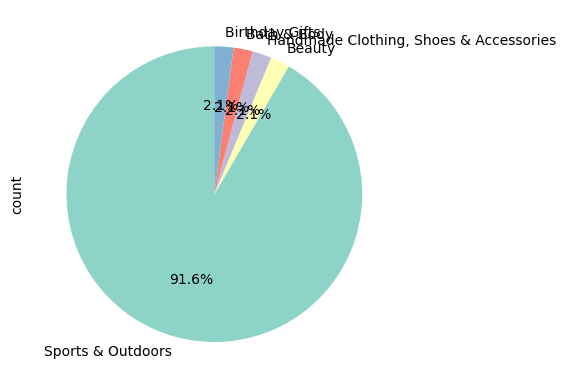

In [37]:
#pie plot
top_five_categories.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_11187/4171588909.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_five_categories.index, x=top_five_categories.values, palette="Set3");


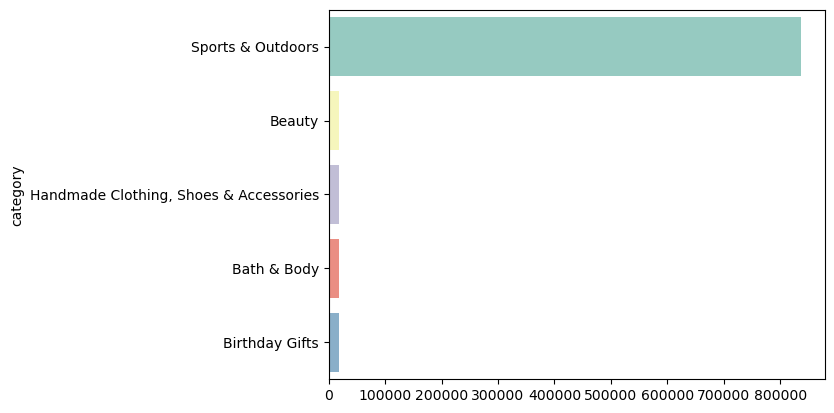

In [41]:
#barplot for top 5 categories
sns.barplot(y=top_five_categories.index, x=top_five_categories.values, palette="Set3");

Part 1)
The top 5 most listed product categories are Sports and outdoor, beauty, handmade clothing, shoes and accessories, bath and body, and birthday gifts.
sports and outdoors by far dominates in terms of listings

In [47]:
#calculate measures of centrality, and dispersion
variance_price = df['price'].var()
std_dev_price = df['price'].std()
avg_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price, avg_price, median_price, mode_price

(119445.4853225653,
 345.6088617535223,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64,
 89.24380943923663,
 19.09,
 9.99)

In [45]:
df['price'].describe()


count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

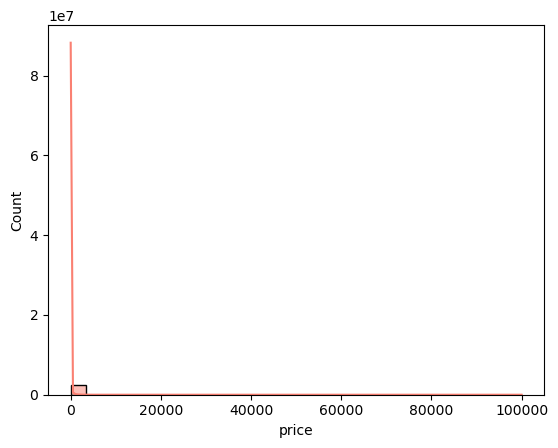

In [62]:
price_hist = sns.histplot(df['price'], kde=True, bins=30, color="salmon");
plt.savefig("price_hist.jpeg", format="jpeg", dpi=300)
plt.show()


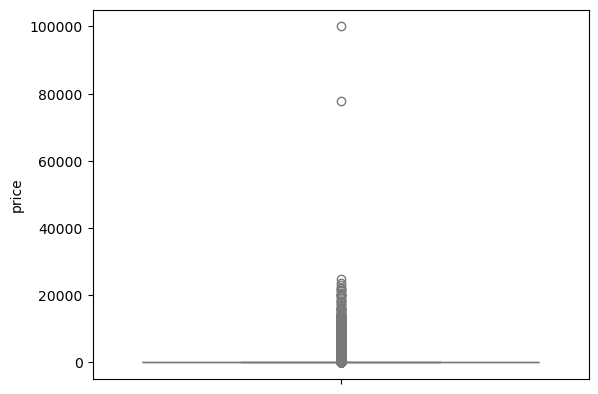

In [59]:
price_boxplot = sns.boxplot(data = df['price'], color="lightblue")
plt.savefig("price_boxplot.jpeg", format="jpeg", dpi=300)
plt.show()


Part 2:
The average price of 89.24 is much higher than the mode of 9.99
There is a high variance in prices (0 - 100000), most prices are in the lower range

The histogram shows that the vast majority of products are priced in a very low range (likely near zero).
Skewness:
The distribution is highly right-skewed, with most data concentrated at the low end and very few products contributing to the high-price range.

In [ ]:
# Filter the data to include prices <= 200.00
capped_prices = df['price'][df['price'] <= 200.00]


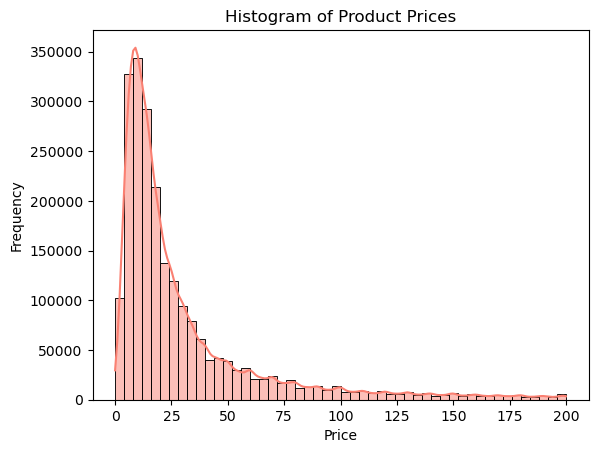

In [102]:
# Using a capped price of 200 directly in the sns.histplot
price_hist_capped = sns.histplot(data = capped_prices, kde=True, bins=50, color="salmon")
plt.title("Histogram of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

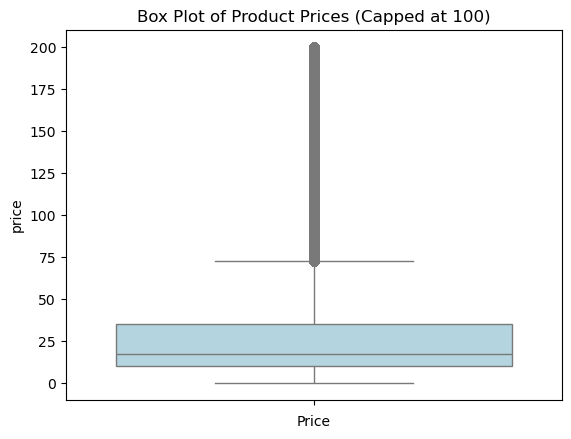

In [104]:
# Create the box plot
price_boxplot_capped = sns.boxplot(data=capped_prices, color="lightblue")
plt.title("Box Plot of Product Prices (Capped at 100)")
plt.xlabel("Price")
plt.show()

In [110]:
#calulate measures of centrality for 'stars'

avg_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

avg_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

In [112]:
# Variance
rating_variance = df['stars'].var()

# Standard Deviation
rating_std_dev = df['stars'].std()

# Interquartile Range (IQR)
q1 = df['stars'].quantile(0.25)  # 25th percentile
q3 = df['stars'].quantile(0.75)  # 75th percentile
rating_iqr = q3 - q1

rating_variance, rating_std_dev, rating_iqr


(4.81743402976196, 2.1948653785054697, 4.4)

In [114]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

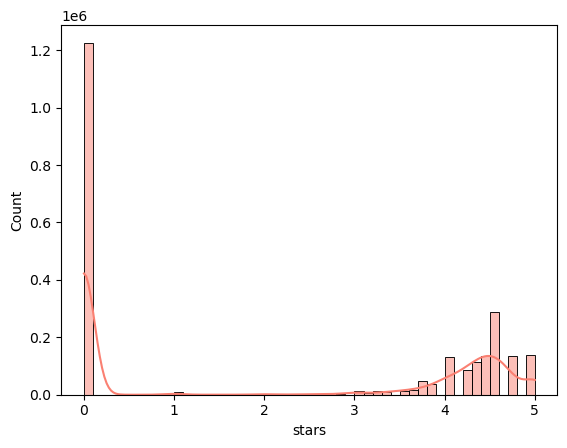

In [118]:
rating_hist = sns.histplot(data = df['stars'], kde=True, bins=50, color="salmon");
plt.show()

Part 3)
customers generally rate products 0
the ratings have a wide variation
the ratings are not normally distributed, they have a flat middle and lean heavily lower and higher.
0 is the most common rating.